In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt
from analysis_functions import make_sure_path_exists

In [2]:
make_sure_path_exists('results/estimates')
make_sure_path_exists('results/dic')
make_sure_path_exists('results/predictions')

In [3]:
np.random.seed(23) # from random.org

# 2.1 GLAM Individual Fits

## Load data

In [4]:
# Load data
sufix = '_Dislike_FixBin5'
data = pd.read_csv(str('data/FF2018_data/GlamDataFF2018_Dislike_Bin_v2.csv'))
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,0,0,1,3327,0.0,5.0,0.745415,0.254585
1,0,1,1,3424,5.0,4.0,0.410720,0.589280
2,0,2,1,3691,4.0,1.0,0.330549,0.669451
3,0,3,0,8144,3.0,5.0,0.592345,0.407655
4,0,4,0,6559,5.0,5.0,0.641717,0.358283


## Fit GLAM variants individually

### 1. full GLAM

In [5]:
# Fitting full GLAM
print('Fitting full GLAM individually...')

glam_full = glam.GLAM(data)
glam_full.make_model('individual', gamma_bounds=(-1, 1), t0_val=0)

if not os.path.exists(str('results/estimates/glam_FF2018_full_individual'+sufix+'.npy')):
    glam_full.fit(method='NUTS', tune=1000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_full.estimates = np.load(str('results/estimates/glam_FF2018_full_individual'+sufix+'.npy'))
    
# Save parameter estimates
np.save(str('results/estimates/glam_FF2018_full_individual'+sufix+'.npy'), glam_full.estimates)

Fitting full GLAM individually...
Generating single subject models for 33 subjects...
  Found old parameter estimates in "results/estimates". Skipping estimation...


In [6]:
#estimates_like = pd.DataFrame(glam_full.estimates)
#estimates_like.to_csv("results/params_estimates/params_indiv_like.csv")

In [7]:
# Predictions
print('Predicting individual subject data using full GLAM...')

if not os.path.exists(str('results/predictions/glam_FF2018_full_individual'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/glam_FF2018_full_individual'+sufix+'.csv'), index=False)
else:
    print('  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/glam_FF2018_full_individual'+sufix+'.csv'))

glam_full.prediction.head()

Predicting individual subject data using full GLAM...
  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,3720.0,0.0,0.0,0.0,0.745415,5.0,0.254585
1,1.0,1.0,3108.0,0.0,0.0,0.0,0.745415,5.0,0.254585
2,1.0,2.0,2679.0,0.0,0.0,0.0,0.745415,5.0,0.254585
3,1.0,3.0,2255.0,0.0,0.0,0.0,0.745415,5.0,0.254585
4,1.0,4.0,3122.0,0.0,0.0,0.0,0.745415,5.0,0.254585


### 2 No-bias $(\gamma=1)$ GLAM

In [8]:
# Fitting no-bias GLAM
print('Fitting no-bias GLAM individually...')

glam_nobias = glam.GLAM(data)
glam_nobias.make_model('individual', gamma_val=1, t0_val=0)

if not os.path.exists(str('results/estimates/glam_FF2018_nobias_individual'+sufix+'.npy')):
    glam_nobias.fit(method='NUTS', tune=1000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_nobias.estimates = np.load(str('results/estimates/glam_FF2018_nobias_individual'+sufix+'.npy'))
    
# Save parameter estimates
np.save(str('results/estimates/glam_FF2018_nobias_individual'+sufix+'.npy'), glam_nobias.estimates)

Fitting no-bias GLAM individually...
Generating single subject models for 33 subjects...
  Found old parameter estimates in "results/estimates". Skipping estimation...


In [9]:
# Predictions
print('Predicting individual subject data using no-bias GLAM...')

if not os.path.exists(str('results/predictions/glam_FF2018_nobias_individual'+sufix+'.csv')):
    glam_nobias.predict(n_repeats=50)
    glam_nobias.prediction.to_csv(str('results/predictions/glam_FF2018_nobias_individual'+sufix+'.csv'), index=False)
else:
    print('  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_nobias.prediction = pd.read_csv(str('results/predictions/glam_FF2018_nobias_individual'+sufix+'.csv'))

glam_nobias.prediction.head()

Predicting individual subject data using no-bias GLAM...
  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,4480.0,0.0,0.0,0.0,0.745415,5.0,0.254585
1,1.0,1.0,3124.0,0.0,0.0,0.0,0.745415,5.0,0.254585
2,0.0,2.0,3644.0,0.0,0.0,0.0,0.745415,5.0,0.254585
3,0.0,3.0,3581.0,0.0,0.0,0.0,0.745415,5.0,0.254585
4,0.0,4.0,3646.0,0.0,0.0,0.0,0.745415,5.0,0.254585


## 2. Plot fit

Close Figure to continue...


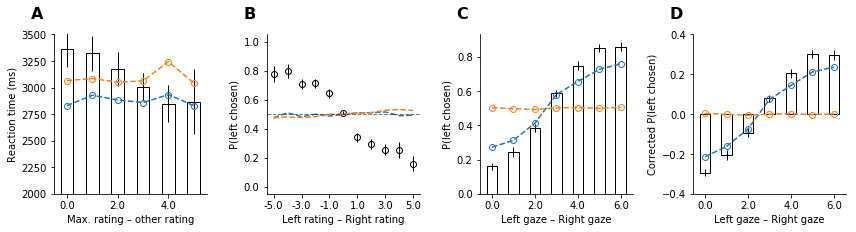

In [10]:
print('Close Figure to continue...')
glam.plot_fit(data, [glam_full.prediction, glam_nobias.prediction]);
plt.show()

## Estimated Params

In [11]:
## TO PLOT ESTIMATED PARAMETERS ##

params_participant = pd.DataFrame(columns=['SNR','b','gamma','p_error','s','t0','tau','v'])
for i in range(len(glam_full.estimates)):
    df1 = pd.DataFrame.from_dict(glam_full.estimates[i])
    params_participant = pd.concat([params_participant, df1])
    
params_participant = params_participant.reset_index(drop=True)

In [12]:
params_participant

,SNR,b,gamma,p_error,s,t0,tau,v
0,40.38,1.0,-0.14,0.05,0.003008,0.0,0.71,0.000047
1,184.99,1.0,-0.99,0.05,0.010956,0.0,0.01,0.000052
2,184.36,1.0,-0.98,0.05,0.009439,0.0,0.01,0.000049
3,151.52,1.0,-0.99,0.05,0.008225,0.0,0.96,0.000053
4,183.36,1.0,-0.99,0.05,0.010870,0.0,4.68,0.000055
5,143.55,1.0,-0.98,0.05,0.007897,0.0,0.37,0.000060
6,171.05,1.0,-0.99,0.05,0.009588,0.0,0.01,0.000062
7,137.64,1.0,0.63,0.05,0.007361,0.0,0.03,0.000049
8,138.75,1.0,-0.98,0.05,0.008136,0.0,0.56,0.000057
9,118.48,1.0,-0.99,0.05,0.008029,0.0,3.68,0.000057


In [13]:
print ("Mean gamma " +  str(params_participant['gamma'].mean()))

Mean gamma -0.711212121212121


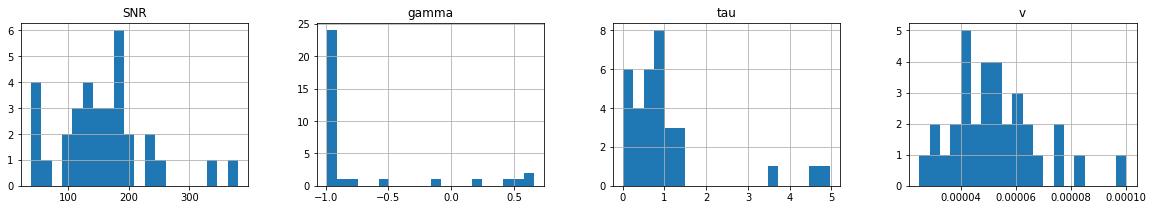

In [14]:
hist = params_participant[['SNR','gamma','tau','v']].hist(figsize = [20,3] , layout=[1,4],bins = 20)

## [END]

In [ ]:
testa = glam_full.prediction

In [ ]:
xlims =(0, 10)

# Compute relevant variables
df = glam.plots.add_difficulty(testa)

# Compute summary statistics
subject_means = df.groupby(['subject', 'difficulty']).rt.mean()
means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]


In [ ]:
subject_means[32]

In [ ]:
means

In [ ]:
testa = glam_nobias.prediction

In [ ]:
xlims =(0, 10)

# Compute relevant variables
df = glam.plots.add_difficulty(testa)

# Compute summary statistics
subject_means = df.groupby(['subject', 'difficulty']).rt.mean()
means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]


In [ ]:
subject_means[31]

In [ ]:
means

## Just Tests

In [ ]:
data
data_difficulty = glam.plots.add_difficulty(data)

In [ ]:
data_difficulty 

In [ ]:
data.to_csv('test_erasable.csv', index=False)

In [ ]:
glam.plots.add_difficulty(data)

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

glam.plots.plot_rt_by_difficulty(data,
                          xlims=(0, 10), xlabel_skip=2,
                          ax=axs[0])

#plot_rt_by_difficulty(data, predictions=None, ax=None, xlims=(1.5, 8.5), xlabel_skip=2)

In [ ]:
fig

In [ ]:
axs

In [ ]:
dataframes

In [ ]:
#if predictions is None:
xlims=(0, 10)
df = glam.plots.add_difficulty(data)
subject_means = df.groupby(['subject', 'difficulty']).rt.mean()
means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]

#elif isinstance(predictions, list):
#    dataframes = [data] + predictions
#else:
#    dataframes = [data] + [predictions]

In [ ]:
x = np.arange(len(means))
predicted = False
if not predicted:  # plot underlying data
    ax.bar(x, means,
            linewidth=1, edgecolor='k', facecolor='w',
            width=0.5)
    ax.vlines(x, means - sems, means + sems,
            linewidth=1, color='k')


In [ ]:
ax

In [ ]:
for i, dataframe in enumerate(dataframes):

        df = dataframe.copy()

        # Compute relevant variables
        df = add_difficulty(df)

        # Compute summary statistics
        subject_means = df.groupby(['subject', 'difficulty']).rt.mean()
        means = subject_means.groupby('difficulty').mean()[xlims[0]:xlims[1]]
        sems = subject_means.groupby('difficulty').sem()[xlims[0]:xlims[1]]

        x = np.arange(len(means))

        predicted = False if i == 0 else True

        if not predicted:  # plot underlying data
            ax.bar(x, means,
                   linewidth=1, edgecolor='k', facecolor='w',
                   width=0.5)
            ax.vlines(x, means - sems, means + sems,
                      linewidth=1, color='k')

        else:  # plot predictions
            ax.plot(x, means, '--o', markerfacecolor='none')